<a href="https://colab.research.google.com/github/Imrgit93/UNS_Netflix-Movies-and-TV-Show-Clustering/blob/main/UNS_Netflix_Movies_and_TV_Show_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Show Clustering.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

As i was provided with data set of a OTT platform Netflix, which is one of the on-demand internet streaming media and online movie rental service provider. It has million's of subscribed members acrose the gloab enjoying more than 100 million hours of TV shows and movies per day, enjoying TV series, documentaries, and feature films across a wide variety of genres and languages.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do

1)Exploratory Data Analysis

2)Understanding what type content is available in different countries

3)Is Netflix has increasingly focusing on TV rather than movies in recent years.

4)Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import SpectralClustering
import scipy.cluster.hierarchy as sch  # Using the dendogram to find the optimal number of clusters
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read the file
nmt = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone _Project/4 - UNS_Netflix Movies and TV Show Clustering./NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
nmt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
nmt.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
nmt.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
nmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(nmt[nmt.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
nmt.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'columns',0:'nullvalues'})

,columns,nullvalues
0,director,2389
1,cast,718
2,country,507
3,date_added,10
4,rating,7
5,show_id,0
6,type,0
7,title,0
8,release_year,0
9,duration,0


In [10]:
# Visualizing the missing values

### What did you know about your dataset?

There are 7787 rows and 12 columns provided in the data.

No duplicate values exist.

Null values are present in director, cast, country, date_added, and rating;

Since there are only few null values present in date_added and rating (10 & 7 respectively) we will drop them them from the data.

As ther are many null values in director ,cast and country ,will replace them with other as to avoid any valuable information if in case they are droped.

In [11]:
#create a copy
nmt1 = nmt.copy()

###  Handling Missing Values

In [12]:
# Replace the null values in director,cast,country.
nmt1['director'].fillna('others',inplace=True)
nmt1['cast'].fillna('others',inplace=True)
nmt1['country'].fillna('others',inplace=True)

In [13]:
# Drop the null values date_added and rating .
nmt1 = nmt1.dropna(axis = 0, how ='any')

In [14]:
nmt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
nmt1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
# Dataset Describe
nmt1.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7770,7770,7770,7770,7770,7770,7770,7770.000000,7770,7770,7770,7770
unique,7770,2,7770,4048,6818,682,1563,NaN,14,216,491,7752
top,s1,Movie,3%,others,others,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5372,1,2376,718,2546,118,NaN,2861,1606,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935393,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.764357,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description 

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in nmt1.columns.tolist():
  print(f"No. of unique values in {i} is {nmt1[i].nunique()}.")

No. of unique values in show_id is 7770.
No. of unique values in type is 2.
No. of unique values in title is 7770.
No. of unique values in director is 4048.
No. of unique values in cast is 6818.
No. of unique values in country is 682.
No. of unique values in date_added is 1563.
No. of unique values in release_year is 73.
No. of unique values in rating is 14.
No. of unique values in duration is 216.
No. of unique values in listed_in is 491.
No. of unique values in description is 7752.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
nmt2 = nmt1.copy()

In [19]:
nmt2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
# Write your code to make your dataset analysis ready.
from datetime import datetime

In [21]:
#Since date_added is in object type convert to datetime type :
nmt2['new_date'] = pd.to_datetime(nmt2['date_added'])
#netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])

In [22]:
nmt2['Year'] = nmt2['new_date'].dt.year

nmt2['Month'] = nmt2['new_date'].dt.month

nmt2['Day'] = nmt2['new_date'].dt.dayofweek

In [23]:
nmt2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,Year,Month,Day
0,s1,TV Show,3%,others,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020,8,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,12,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,12,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017,11,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020,1,2


### What all manipulations have you done and insights you found?

Most of data wrangling part will be done further at visualization part as per requirement.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Content Type')

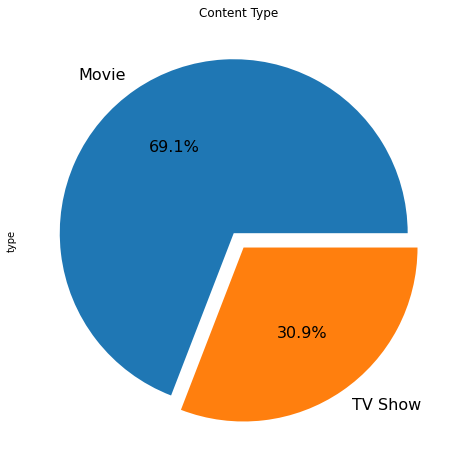

In [24]:
# Chart - 1 Ratio of movie to tvshow share in netflix
nmt2['type'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', figsize=(10,8),fontsize=16)
plt.title('Content Type')

##### 1. Why did you pick the specific chart?

As to see univarient analysis and this variable have only 2 unique values.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that 

Movie    are with  5372 count which is 69.1%

TV Show   are with  2398 count which is 30.9%

#### Chart - 2

In [25]:
#creating two seperate dataframe for TV shows and movies
tv_show_df = nmt2[nmt2["type"] == "TV Show"]
movie_df = nmt2[nmt2["type"] == "Movie"]

In [26]:
tv_show_y = tv_show_df['Year'].value_counts().reset_index()
tv_show_y = tv_show_y.rename(columns = {'Year' : 'count', 'index' : 'Year'})
tv_show_y=tv_show_y.sort_values('Year')
#content_1 = content_1.sort_values(col)
tv_show_y

,Year,count
9,2008,1
8,2013,5
7,2014,6
5,2015,30
4,2016,184
3,2017,361
2,2018,429
1,2019,656
0,2020,697
6,2021,29


In [27]:
movie_y = movie_df['Year'].value_counts().reset_index()
movie_y = movie_y.rename(columns = {'Year' : 'count', 'index' : 'Year'})
movie_y = movie_y.sort_values('Year')
movie_y

,Year,count
13,2008,1
11,2009,2
12,2010,1
8,2011,13
10,2012,3
9,2013,6
7,2014,19
6,2015,58
4,2016,256
3,2017,861


Text(0.5, 1.0, 'content added in netflix over years')

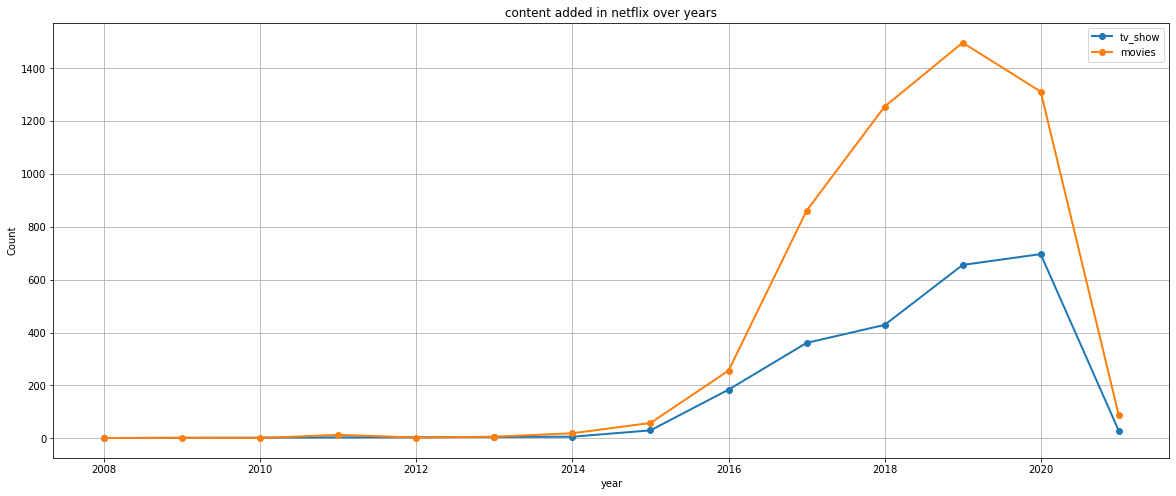

In [28]:
#plot for multivarient analysis on yearly addtion of content for both tv_shows and movies.
plt.subplots(figsize = (20, 8))
plt.grid(visible= True, which='major', axis='both')
plt.plot(tv_show_y['Year'],tv_show_y['count'],label= 'tv_show', marker = 'o', linewidth=2.0)
plt.plot(movie_y['Year'],movie_y['count'],label = 'movies', marker = 'o', linewidth=2.0)
plt.legend()
plt.xlabel('year')
plt.ylabel('Count')
plt.title('content added in netflix over years')

##### 1. Why did you pick the specific chart?

To find yearly analysis over Tv shows and movies added in netflix

##### 2. What is/are the insight(s) found from the chart?

Movies added are more compared to tv shows.

And year 2019 had large amont of content added.

#### Chart - 3

Text(0.5, 1.0, 'distribution by released year')

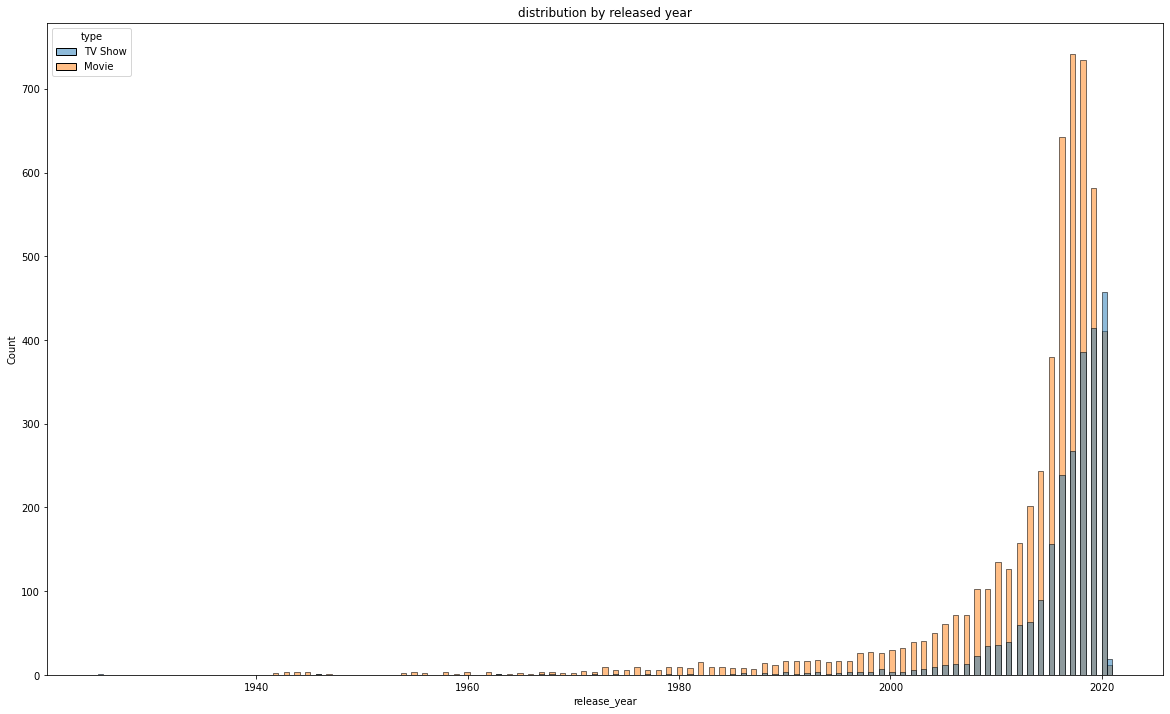

In [29]:
# Chart - 3 visualization code
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(20,12))
sns.histplot(data = nmt2,x= 'release_year',hue='type')
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

To find yearly analysis over Tv shows and movies added in netflix

##### 2. What is/are the insight(s) found from the chart?

Movies released are more compared to tv shows.


#### Chart - 4

In [30]:
# Chart - 4 visualization code

In [31]:
#Count for director of Tvshows
Direct_tv = tv_show_df['director'].value_counts().reset_index()
Direct_tv = Direct_tv.rename(columns = {'director' : 'count', 'index' : 'director'}) 
Direct_tv = Direct_tv[~(Direct_tv['director']=='others')] 
Direct_tv

,director,count
1,Alastair Fothergill,3
2,Shin Won-ho,2
3,Iginio Straffi,2
4,Rob Seidenglanz,2
5,Stan Lathan,2
...,...,...
173,Hong Won-ki,1
174,Neslihan Yesilyurt,1
175,Danny Cannon,1
176,Ah Loong,1


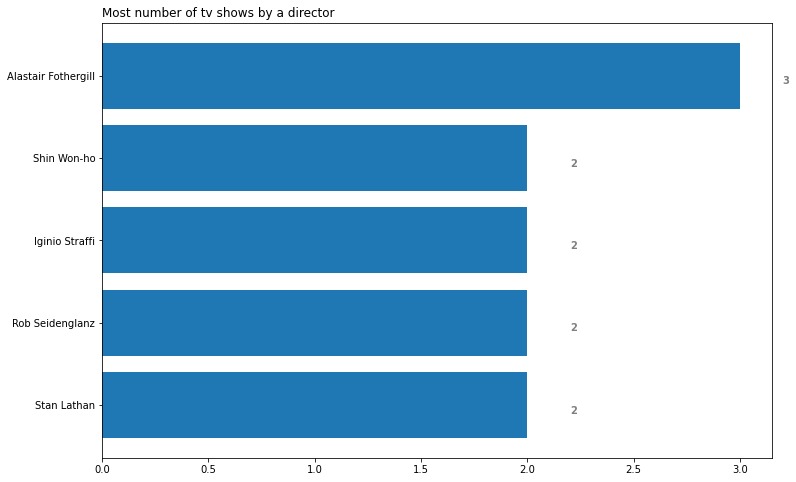

In [32]:
# Figure Size
fig, ax = plt.subplots(figsize =(12, 8))
# Horizontal Bar Plot
ax.barh(Direct_tv['director'].iloc[0:5], Direct_tv['count'].iloc[0:5])
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Most number of tv shows by a director',
             loc ='left', )
# Show Plot
plt.show()


In [33]:
#Count for director of movies
Direct_M= movie_df['director'].value_counts().reset_index()
Direct_M = Direct_M.rename(columns = {'director' : 'count', 'index' : 'director'}) 
Direct_M = Direct_M[~(Direct_M['director']=='others')] 
Direct_M

,director,count
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,15
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Youssef Chahine,12
...,...,...
3903,Elle Callahan,1
3904,Ana Kokkinos,1
3905,"Timo Tjahjanto, Kimo Stamboel",1
3906,Kelly Noonan,1


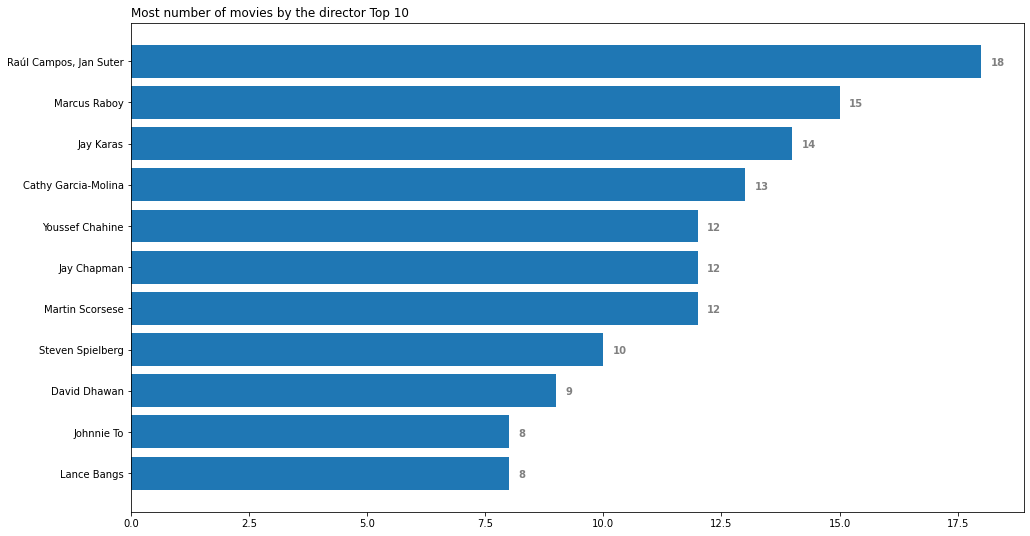

In [34]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(Direct_M['director'].iloc[0:11], Direct_M['count'].iloc[0:11])
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Most number of movies by the director Top 10 ',
             loc ='left', )
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart to define the top among the list

**Top 5 Tvshow making Directors are**

Alastair Fothergill	with 3

Shin Won-ho	 with 2

Iginio Straffi with	2

Rob Seidenglanz	 with 2

Stan Lathan with 2

**Top 5 movie making Directors are**

Raúl Campos, Jan Suter with	18

Marcus Raboy with 	15

Jay Karas with 14

Cathy Garcia-Molina	with 13

Youssef Chahine	 with 12



#### Chart - 5

In [35]:
#Ploting country wise movie and tv shows.
T_C = nmt2[['country','type']].value_counts().reset_index()
T_C = T_C.rename(columns = {'country' : 'country', 'type' : 'type',0:'count'})  
T_C.head(20)

,country,type,count
0,United States,Movie,1847
1,India,Movie,852
2,United States,TV Show,699
3,others,TV Show,276
4,others,Movie,229
5,United Kingdom,TV Show,203
6,United Kingdom,Movie,193
7,Japan,TV Show,155
8,South Korea,TV Show,147
9,Canada,Movie,118


Text(0, 0.5, 'Count')

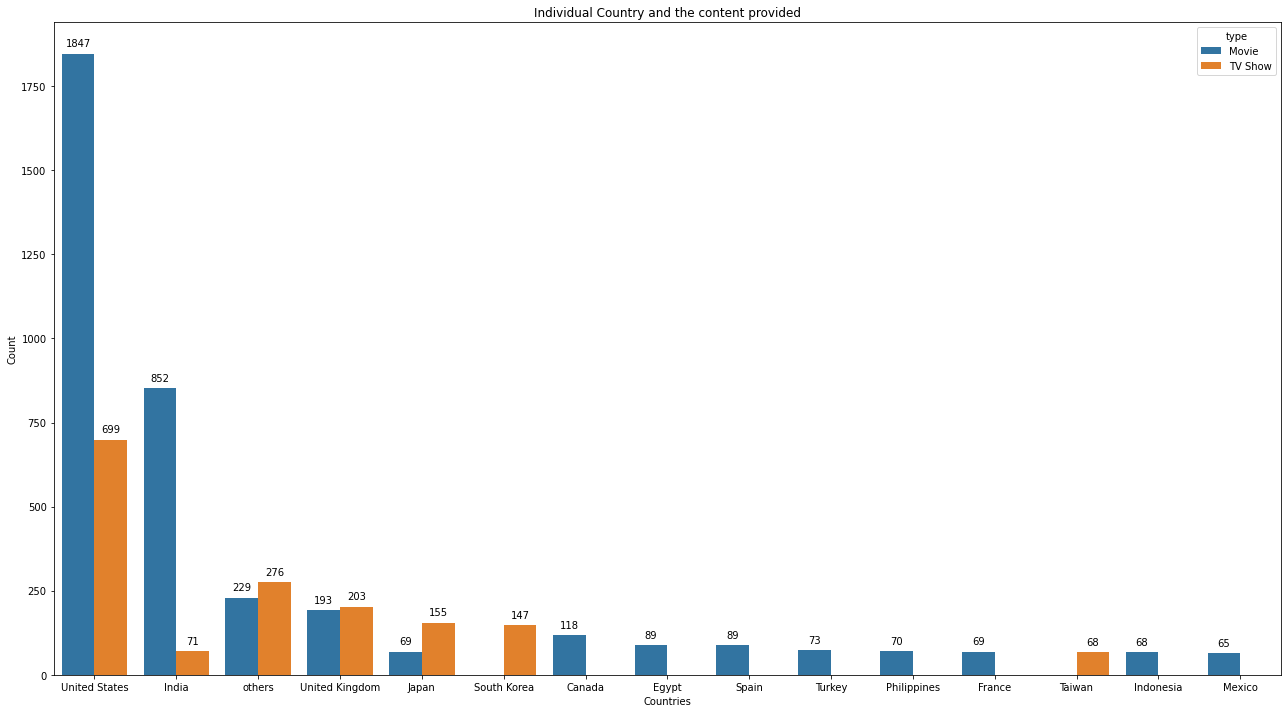

In [36]:
plt.figure(figsize=(22,12))
p = sns.barplot(x='country',y='count',hue='type',data=T_C[0:20])
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Individual Country and the content provided')
plt.xlabel('Countries')
plt.ylabel('Count')

##### 2. What is/are the insight(s) found from the chart?

Bar chart to define the top among the list

**Top 5 movie making Countries are**

1)United States with 1847

2)India with 852

3)United Kingdom with 193

4)Canada	with 	118

5)Egypt	with 	89

**Top 5 TV show making Countries are**

1)United States	with	699

2)United Kingdom	with	203

3)Japan	with	155

4)South Korea	with	147

5)India	with	71

#### Chart - 6

In [37]:
#function to call as list of every item in each row of that column
def make_l(o):
    li = list(o.split(","))
    N_c = []
    if len(li) == 0:
      N_c = list(o)
    else:
      N_c = li 
    return N_c

In [38]:
# function to create a new disctinary with individual count 
#here x is the new variable or column name created from above function make_l
def count(x):
  a = []
  e = {}
  for i in range(len(nmt2)):
    try:                            #this block is to avoid if an index count is missing as here 67 was not found
      l1 = nmt2[x][i]
      for j in l1:
        a.append(j)
    except:
      pass  
  for i,j in enumerate (a):
      if j in e: 
        e[j] += 1
      else:
        e[j] = 1 
  return e 

In [39]:
#calling make_l and creatting new variable as list
nmt2['gener_list'] = nmt2['listed_in'].apply(make_l)

In [40]:
#calling count(x) and creatting count for each individual item
gener_dict = count('gener_list')

In [41]:
#new datafram for geners
gener_df = pd.DataFrame.from_dict(gener_dict, orient ='index').reset_index()
gener_df1 = gener_df.sort_values(0, ascending=False)

In [42]:
# Chart - 6 visualization code
# genre of netfix content
gener_df1

,index,0
4,International Movies,2317
3,Dramas,1379
17,Comedies,1073
14,Documentaries,747
6,Action & Adventure,721
...,...,...
70,Romantic Movies,3
71,Spanish-Language TV Shows,2
19,Sports Movies,1
69,TV Sci-Fi & Fantasy,1


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

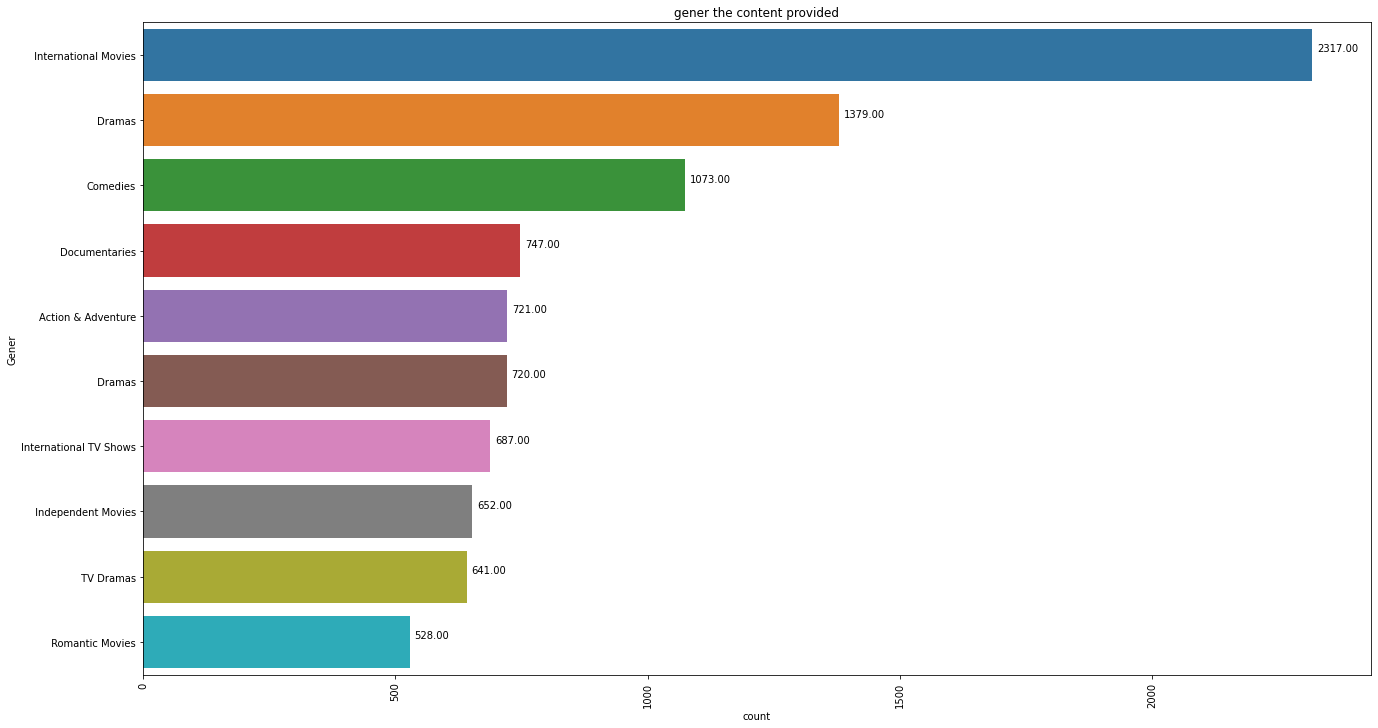

In [43]:
#ploting the top geners
plt.figure(figsize=(22,12))
ax = sns.barplot(x=0,y= 'index',data=gener_df1[0:10], orient='h')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points')
plt.title('gener the content provided')
plt.xlabel('count')
plt.ylabel('Gener')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Bar plot as easy to know level of each count

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Geners in netflix are**

1) International Movies	2317

2)	Dramas	1379

3)	Comedies	1073

4)	Documentaries	747

5) Action & Adventure	721

#### Chart - 7

In [44]:
nmt2['cast_list'] = nmt2['cast'].apply(make_l)

In [45]:
actor_dict = count('cast_list')

In [46]:
#new datafram for actors
actor_df = pd.DataFrame.from_dict(actor_dict, orient ='index').reset_index()
actor_df1 = actor_df.sort_values(0, ascending=False).drop(106)

In [47]:
actor_df1

,index,0
1294,Anupam Kher,37
194,Takahiro Sakurai,27
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
...,...,...
15342,Edwin Maya,1
15341,Juliana Galvis,1
15338,George Slebi,1
15337,Carolina Gómez,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

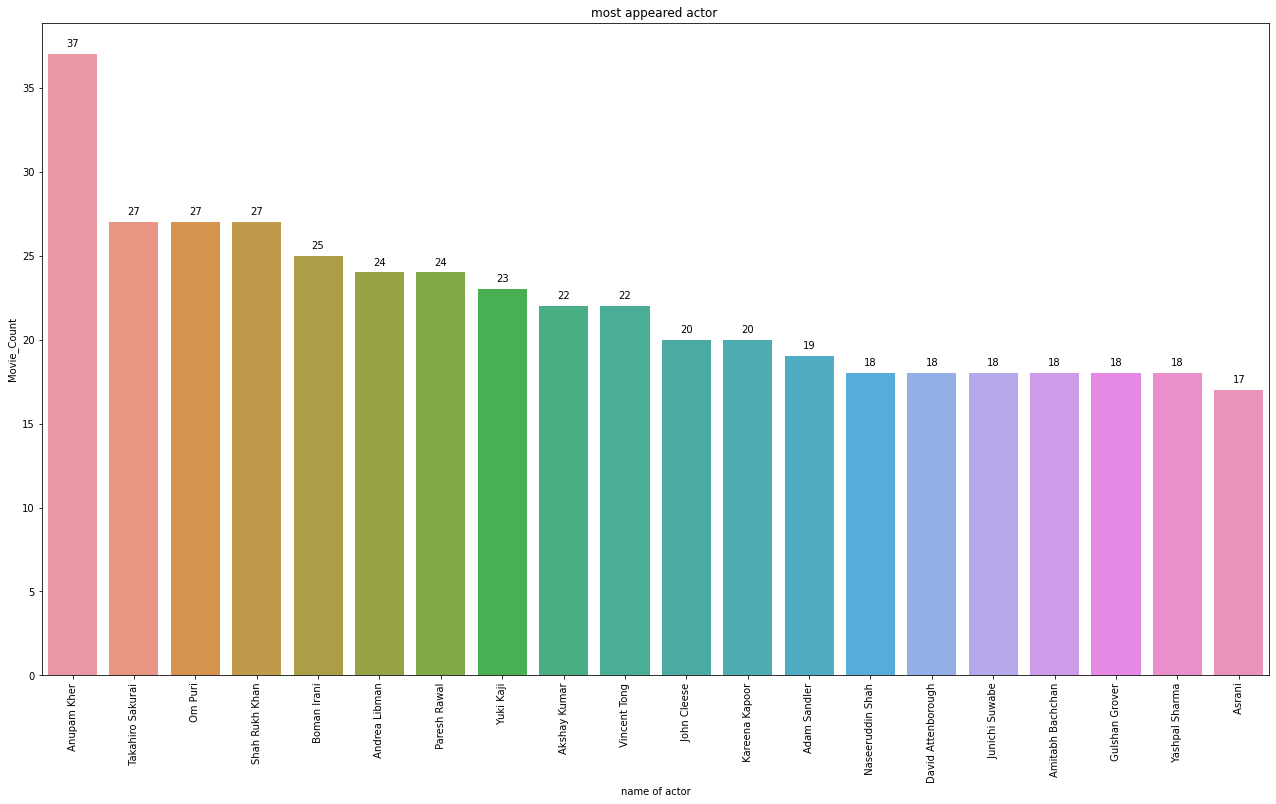

In [48]:
#ploting the actors
plt.figure(figsize=(22,12))
p = sns.barplot(x='index',y=0,data=actor_df1[0:20])
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('most appeared actor ')
plt.xlabel('name of actor')
plt.ylabel('Movie_Count')
plt.xticks(rotation=90)

##### 2. What is/are the insight(s) found from the chart?

**Top 5 most appeared actor are**

1)Anupam Kher	37

2)	Takahiro Sakurai	27

3)	Om Puri	27

4)	Shah Rukh Khan	27

5)	Boman Irani	25

#### Chart - 9

In [49]:
movie_df['duration'] = movie_df['duration'].apply(lambda x: int(x.split()[0]))

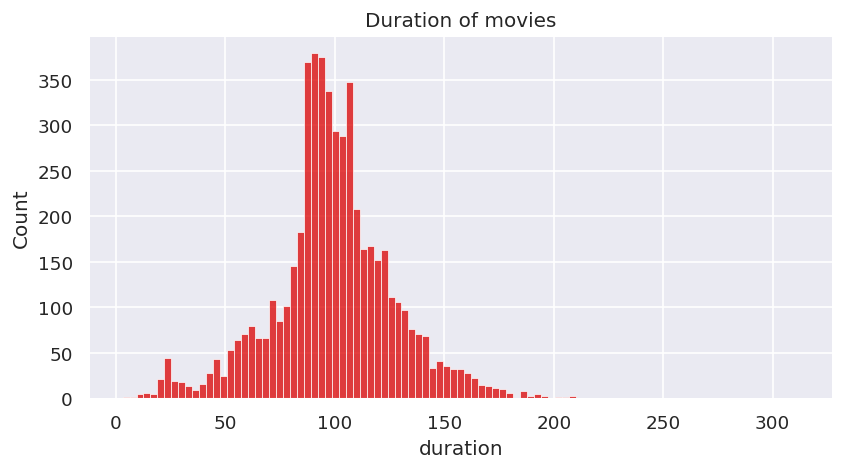

In [50]:
# Chart - 9 visualization code
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=movie_df['duration'], color='#db0000')
#plt.xticks(rotation=45)
plt.title('Duration of movies')
plt.show()

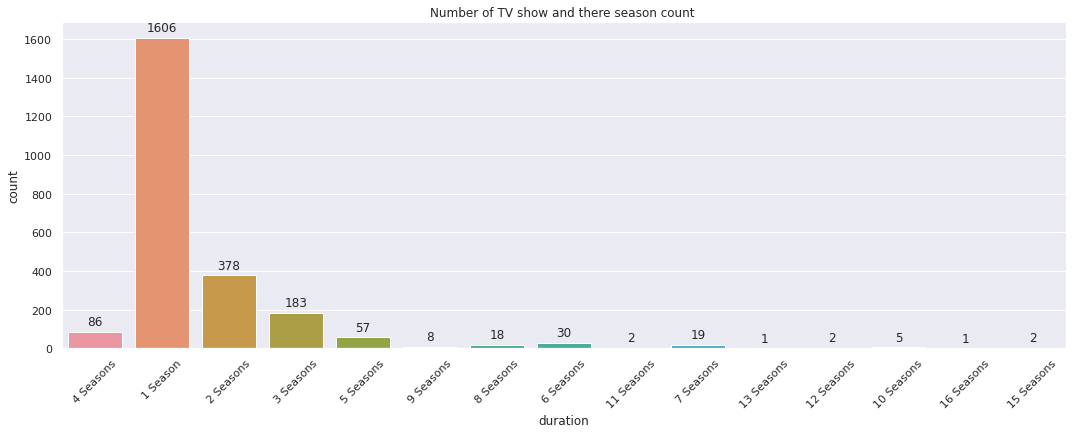

In [51]:
# Seasons in each TV show
plt.figure(figsize=(18,6))
p = sns.countplot(x='duration',data=nmt2[nmt2['type']=='TV Show'])
plt.xticks(rotation=45)
plt.title('Number of TV show and there season count ')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1)Movie Dureation is between 10 to 200,where as most of the movies are in between 60 to 150 minutes.

2)tv shows with only season 1 are most, following season 2 and 3.Very few tv shows ran for longer seasons

#### Chart - 10

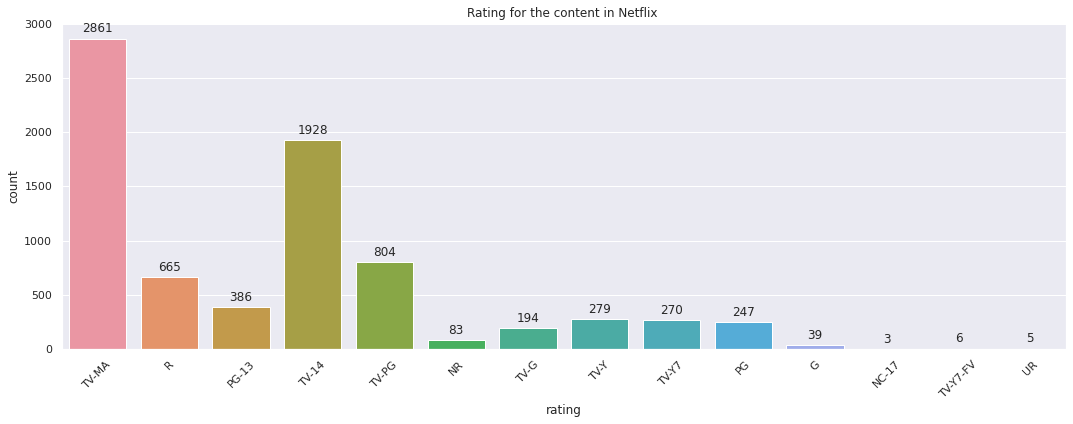

In [52]:
# Chart - 10 visualization code
plt.figure(figsize=(18,6))
p = sns.countplot(x='rating',data=nmt2)
plt.xticks(rotation=45)
plt.title('Rating for the content in Netflix ')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 2. What is/are the insight(s) found from the chart?

Content with rating TV-MA are highest with  2861 count,following TV-14 with 1928 and TV-PG with 804

wereas content with rating UR is 5 and G is 3 recorded low count.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null_hypothesis = Average movie duration  is greater than  70 Minutes

Alternate = Average movie duration not the given values.

#### 2. Perform an appropriate statistical test.

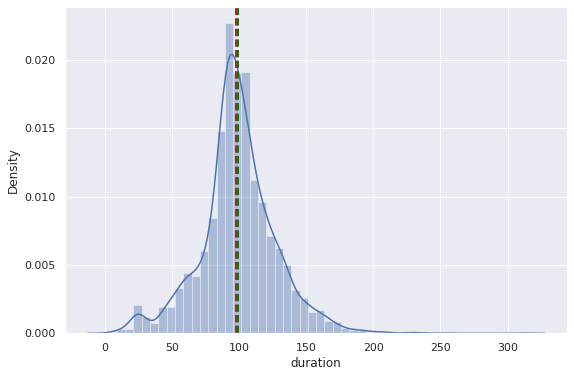

In [53]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
sns.distplot(movie_df['duration'])
ax.axvline(movie_df['duration'].mean(),color='green', linestyle='dashed', linewidth=2)
ax.axvline(movie_df['duration'].median(),color='brown', linestyle='dashed', linewidth=2)
plt.show()

In [54]:
# Creating Parameter Class 
from numpy import math
def mean(hyp,sample,size,std):
  return (sample - hyp)*math.sqrt(size)/std
  

In [55]:
#Pvalue
from scipy.stats import norm
def p_value(z):
    prob_z = norm.cdf(z, 0, 1)
    return 1-z

In [56]:
def conclusion(p):
  significance_level = 0.05
  if p<significance_level:
    return f"Null Hypothesis rejected Successfully for p = {p}"
  else:
    return f"Failed to reject the Null Hypothesis for p = {p}."

In [57]:
sample_size = 30
subset = movie_df.sample(n=sample_size)
sample_mean = subset['duration'].mean()
hypothesis_mean = movie_df['duration'].mean()

import statistics
df_sd = statistics.pstdev(movie_df['duration'])

print (f'Standard deviation is {df_sd}')
print (f'hypothesis mean is {hypothesis_mean}')
print (f'Mean of sample is {sample_mean}')

Standard deviation is 28.52155104066174
hypothesis mean is 99.33041697691735
Mean of sample is 94.86666666666666


In [58]:
z = mean(sample_mean,hypothesis_mean,sample_size,df_sd)
z

0.8572103012593598

In [59]:
P_val = p_value(z)
P_val

0.14278969874064018

In [60]:
conclusion(P_val)

'Failed to reject the Null Hypothesis for p = 0.14278969874064018.'

##### Which statistical test have you done to obtain P-Value?

Right tailed Z-test

##### Why did you choose the specific statistical test?

Since our data is normally distributed

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis =  year added has no impact on type of content that gets added to the platform.

Alternative Hypothesis =  year added has impact on type of content that gets added to the platform.

#### 2. Perform an appropriate statistical test.

In [109]:

from scipy.stats import chi2_contingency

In [112]:
# Perform Statistical Test to obtain P-Value
s_chd_td = pd.crosstab(index = nmt2['type'],columns = nmt2['Year'])
chi2, pval , dof, expctd  = chi2_contingency(s_chd_td )
print(f'Chi-Squared Value: {chi2}')
print(f'P-value:    {pval} ')
if pval < 0.05 :
      print('Reject the null hypothesis,and thereis a relatiionship between year added and type of content' )
else:
      print('Fail to reject the null hypothesis,and there is no relatiionship between year added and type of content')
  

Chi-Squared Value: 75.56247369410984
P-value:    7.478336952750899e-11 
Reject the null hypothesis,and thereis a relatiionship between year added and type of content


##### Which statistical test have you done to obtain P-Value?

Chi-Squared testing is used when testing statistical independence or associaton between categorical variables

## ***6. Feature Engineering & Data Pre-processing***

##  Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [70]:
nmt2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,Year,Month,Day,gener_list,cast_list
0,s1,TV Show,3%,others,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020,8,4,"[International TV Shows, TV Dramas, TV Sci-F...","[João Miguel, Bianca Comparato, Michel Gomes..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,12,4,"[Dramas, International Movies]","[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,12,3,"[Horror Movies, International Movies]","[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017,11,3,"[Action & Adventure, Independent Movies, Sci...","[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020,1,2,[Dramas],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."


In [71]:
nmt2['cast'][7783]

'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'

In [72]:
type(nmt2['cast'][7783])

str

In [73]:
#columns required for futher process
Columns = ['type', 'title', 'director', 'cast', 'rating', 'listed_in', 'description']

In [74]:
#new dataframe with required columns
nmt3 = nmt2[Columns]
nmt3

,type,title,director,cast,rating,listed_in,description
0,TV Show,3%,others,"João Miguel, Bianca Comparato, Michel Gomes, R...",TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",PG-13,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",TV-MA,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",TV-14,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,Movie,Zulu Man in Japan,others,Nasty C,TV-MA,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,TV Show,Zumbo's Just Desserts,others,"Adriano Zumbo, Rachel Khoo",TV-PG,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [75]:
#function to call only first 5 actors
def main_cast1(o):
    li = list(o.split(","))
    N_c = []
    if len(li) == 0:
      N_c = list(o)
    #return N_c
    elif len(li) >= 5:
      count = 0
      for i in li:
        if count != 5:
          N_c.append(i)
          count += 1
        else:
          break
    else:
      N_c = li 
    return N_c

In [76]:
nmt3['cast'][7783]

'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'

In [77]:
main_cast1(nmt3['cast'][7783])

['Vicky Kaushal',
 ' Sarah-Jane Dias',
 ' Raaghav Chanana',
 ' Manish Chaudhary',
 ' Meghna Malik']

In [78]:
#Defining a function to call only first 2 directors
def main_dic(o):
  #def Convert(o):
  li = list(o.split(","))
  N_c = []
  if len(li) == 0:
    N_c = list(o)
      #return N_c
  elif len(li) >= 5:
    count = 0
    for i in li:
      if count != 5:
        N_c.append(i)
        count += 1
      else:
        break
  else:
    N_c = li 
  return N_c 

In [79]:
nmt3['Main_Cast'] = nmt3['cast'].apply(main_cast1)
nmt3['Main_director'] = nmt3['director'].apply(main_dic)

In [80]:
nmt3

,type,title,director,cast,rating,listed_in,description,Main_Cast,Main_director
0,TV Show,3%,others,"João Miguel, Bianca Comparato, Michel Gomes, R...",TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes...",[others]
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Jorge Michel Grau]
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Gilbert Chan]
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",[Shane Acker]
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",PG-13,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[Robert Luketic]
...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",TV-MA,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...",[Josef Fares]
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",TV-14,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",[Mozez Singh]
7784,Movie,Zulu Man in Japan,others,Nasty C,TV-MA,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",[Nasty C],[others]
7785,TV Show,Zumbo's Just Desserts,others,"Adriano Zumbo, Rachel Khoo",TV-PG,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,"[Adriano Zumbo, Rachel Khoo]",[others]


In [81]:
type(nmt3['listed_in'][0])

str

In [82]:
#converting string in to list so as we can add rest of the list 
nmt3['genre'] = nmt3['listed_in'].apply(lambda x :x.split(','))
nmt3['summary'] = nmt3['description'].apply(lambda x :x.split(' '))

In [83]:
#Droping the columns which are not forther used
nmt3 = nmt3.drop(['description','listed_in','director','cast'], axis=1)

####  Removing space

In [84]:
#remove space between each words 
nmt3['Main_Cast'] = nmt3['Main_Cast'].apply(lambda x :[i.replace(' ','') for i in x])
nmt3['Main_director'] = nmt3['Main_director'].apply(lambda x :[i.replace(' ','') for i in x])
#nmt3['genre'] = nmt3['genre'].apply(lambda x :[i.replace(' ','') for i in x])
nmt3['summary'] = nmt3['summary'].apply(lambda x :[i.replace(' ','') for i in x])
#string to list also
nmt3['type'] = nmt3['type'].apply(lambda x :[x.replace(' ','')])

In [85]:
nmt3['Final_mgs'] = nmt3['type'] + nmt3['Main_Cast'] + nmt3['Main_director'] + nmt3['genre'] + nmt3['summary']

In [86]:
nmt3.head()

,type,title,rating,Main_Cast,Main_director,genre,summary,Final_mgs
0,[TVShow],3%,TV-MA,"[JoãoMiguel, BiancaComparato, MichelGomes, Rod...",[others],"[International TV Shows, TV Dramas, TV Sci-F...","[In, a, future, where, the, elite, inhabit, an...","[TVShow, JoãoMiguel, BiancaComparato, MichelGo..."
1,[Movie],7:19,TV-MA,"[DemiánBichir, HéctorBonilla, OscarSerrano, Az...",[JorgeMichelGrau],"[Dramas, International Movies]","[After, a, devastating, earthquake, hits, Mexi...","[Movie, DemiánBichir, HéctorBonilla, OscarSerr..."
2,[Movie],23:59,R,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[GilbertChan],"[Horror Movies, International Movies]","[When, an, army, recruit, is, found, dead,, hi...","[Movie, TeddChan, StellaChung, HenleyHii, Lawr..."
3,[Movie],9,PG-13,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[ShaneAcker],"[Action & Adventure, Independent Movies, Sci...","[In, a, postapocalyptic, world,, rag-doll, rob...","[Movie, ElijahWood, JohnC.Reilly, JenniferConn..."
4,[Movie],21,PG-13,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[RobertLuketic],[Dramas],"[A, brilliant, group, of, students, become, ca...","[Movie, JimSturgess, KevinSpacey, KateBosworth..."


In [87]:
nmt4 = nmt3[['title','Final_mgs']]
nmt4

,title,Final_mgs
0,3%,"[TVShow, JoãoMiguel, BiancaComparato, MichelGo..."
1,7:19,"[Movie, DemiánBichir, HéctorBonilla, OscarSerr..."
2,23:59,"[Movie, TeddChan, StellaChung, HenleyHii, Lawr..."
3,9,"[Movie, ElijahWood, JohnC.Reilly, JenniferConn..."
4,21,"[Movie, JimSturgess, KevinSpacey, KateBosworth..."
...,...,...
7782,Zozo,"[Movie, ImadCreidi, AntoinetteTurk, EliasGergi..."
7783,Zubaan,"[Movie, VickyKaushal, Sarah-JaneDias, RaaghavC..."
7784,Zulu Man in Japan,"[Movie, NastyC, others, Documentaries, Intern..."
7785,Zumbo's Just Desserts,"[TVShow, AdrianoZumbo, RachelKhoo, others, Int..."


####  Removing Punctuations and stopwords

In [88]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [89]:
import string
from nltk.corpus import stopwords

In [90]:
mgs_1 = nmt4['Final_mgs'].iloc[0]
mgs_1

['TVShow',
 'JoãoMiguel',
 'BiancaComparato',
 'MichelGomes',
 'RodolfoValente',
 'VanezaOliveira',
 'others',
 'International TV Shows',
 ' TV Dramas',
 ' TV Sci-Fi & Fantasy',
 'In',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums,',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 '3%',
 'saved',
 'from',
 'squalor.']

In [91]:
#trail for removal of punctuations
nopunc = [char for char in mgs_1 if char not in string.punctuation]
nopunc=' '.join(nopunc)
nopunc

'TVShow JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira others International TV Shows  TV Dramas  TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [92]:
#function for removal of punctuations and stopwords.
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=' '.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [93]:
nmt4['tokenized_message'] = nmt4['Final_mgs'].apply(text_process)

In [94]:
nmt4

,title,Final_mgs,tokenized_message
0,3%,"[TVShow, JoãoMiguel, BiancaComparato, MichelGo...",TVShow JoãoMiguel BiancaComparato MichelGomes ...
1,7:19,"[Movie, DemiánBichir, HéctorBonilla, OscarSerr...",Movie DemiánBichir HéctorBonilla OscarSerrano ...
2,23:59,"[Movie, TeddChan, StellaChung, HenleyHii, Lawr...",Movie TeddChan StellaChung HenleyHii LawrenceK...
3,9,"[Movie, ElijahWood, JohnC.Reilly, JenniferConn...",Movie ElijahWood JohnC.Reilly JenniferConnelly...
4,21,"[Movie, JimSturgess, KevinSpacey, KateBosworth...",Movie JimSturgess KevinSpacey KateBosworth Aar...
...,...,...,...
7782,Zozo,"[Movie, ImadCreidi, AntoinetteTurk, EliasGergi...",Movie ImadCreidi AntoinetteTurk EliasGergi Car...
7783,Zubaan,"[Movie, VickyKaushal, Sarah-JaneDias, RaaghavC...",Movie VickyKaushal Sarah-JaneDias RaaghavChana...
7784,Zulu Man in Japan,"[Movie, NastyC, others, Documentaries, Intern...",Movie NastyC others Documentaries Internationa...
7785,Zumbo's Just Desserts,"[TVShow, AdrianoZumbo, RachelKhoo, others, Int...",TVShow AdrianoZumbo RachelKhoo others Internat...


In [95]:
nmt4['tokenized_message'][0]

'TVShow JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira others International TV Shows TV Dramas TV Sci-Fi & Fantasy future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

####  Tokenization

In [96]:
#function for stemming by porter
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def p_stem_mgs(sent):
  stem_sentence=[]
  for word in sent.split():
      stem_sentence.append(porter.stem(word))
  return " ".join(stem_sentence)

In [97]:
#function for stemming by snowball
from nltk.stem.snowball import SnowballStemmer
SN_st = SnowballStemmer("english")
def sn_stem_mgs(sent):
  stem_sentence=[]
  for word in sent.split():
      stem_sentence.append(SN_st .stem(word))
  return " ".join(stem_sentence)

In [98]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [99]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [100]:
#function for using lematization.
def lemma1(sent):
  lema_sentence=[]
  for word in sent.split():
    l = ["n","v","a","r","s"] # n = noun,v= verbs,a = adverb use to find in words
    for i,e in enumerate(l):
      f = lemmatizer.lemmatize(word, pos = e )
      if word != f:
        break
    lema_sentence.append(f)
  return " ".join(lema_sentence) 

In [101]:
trail = "children were running and eating at same time. a child has bad habit of swimming after playing long hours in the Sun."
trail

'children were running and eating at same time. a child has bad habit of swimming after playing long hours in the Sun.'

In [102]:
p_stem_mgs(trail)

'children were run and eat at same time. a child ha bad habit of swim after play long hour in the sun.'

In [103]:
sn_stem_mgs(trail)

'children were run and eat at same time. a child has bad habit of swim after play long hour in the sun.'

In [104]:
lemma1(trail)

'child be run and eat at same time. a child ha bad habit of swim after play long hour in the Sun.'

**Observation**

From above trail it is clear that lematization is doing better extracting root word.

In [105]:
nmt4['lemmat_message'] = nmt4['tokenized_message'].apply(lemma1)

In [106]:
nmt4.head()

,title,Final_mgs,tokenized_message,lemmat_message
0,3%,"[TVShow, JoãoMiguel, BiancaComparato, MichelGo...",TVShow JoãoMiguel BiancaComparato MichelGomes ...,TVShow JoãoMiguel BiancaComparato MichelGomes ...
1,7:19,"[Movie, DemiánBichir, HéctorBonilla, OscarSerr...",Movie DemiánBichir HéctorBonilla OscarSerrano ...,Movie DemiánBichir HéctorBonilla OscarSerrano ...
2,23:59,"[Movie, TeddChan, StellaChung, HenleyHii, Lawr...",Movie TeddChan StellaChung HenleyHii LawrenceK...,Movie TeddChan StellaChung HenleyHii LawrenceK...
3,9,"[Movie, ElijahWood, JohnC.Reilly, JenniferConn...",Movie ElijahWood JohnC.Reilly JenniferConnelly...,Movie ElijahWood JohnC.Reilly JenniferConnelly...
4,21,"[Movie, JimSturgess, KevinSpacey, KateBosworth...",Movie JimSturgess KevinSpacey KateBosworth Aar...,Movie JimSturgess KevinSpacey KateBosworth Aar...


In [107]:
nmt4['lemmat_message'][0]

'TVShow JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira others International TV Shows TV Dramas TV Sci-Fi & Fantasy future elite inhabit island paradise far crowd slums, get one chance join 3% save squalor.'

In [108]:
#code to download a file from above final result
'''
from google.colab import files
nmt4.to_csv('Lematized_file.csv') 
files.download('Lematized_file.csv')
'''

"\nfrom google.colab import files\nnmt4.to_csv('Lematized_file.csv') \nfiles.download('Lematized_file.csv')\n"

##Go to the other file Part 2

https://colab.research.google.com/drive/1CvvhOq8DZV8kOtdSV3ZCwAdG7RzSIeG-#scrollTo=afVoMAOZlPXX